Example of the use of the eFEL (eFeature Extraction Library) in conjunction with models downloaded from the Neocortical Microcircuit Portal website

Requirements:
- Python 3.9+, including Pip (https://pip.readthedocs.org)
- A version of Neuron (with Python support) installed on your computer (for instruction, see https://bbp.epfl.ch/nmc-portal/tools)

Make matplotlib plots show up in the notebook: 

In [1]:
%matplotlib inline

Install the eFeature Extraction Library:

In [ ]:
!pip install efel
import efel

Get a model package from the website

In [ ]:
!curl -o L5_TTPC2.zip https://bbp.epfl.ch/nmc-portal/assets/documents/static/downloads-zip/L5_TTPC2_cADpyr232_1.zip

Unzip the model package:

In [ ]:
!unzip L5_TTPC2.zip

Change directory to the model package directory:

In [5]:
import os
os.chdir('L5_TTPC2_cADpyr232_1')

Compile the Neuron mechanisms (if this fails, you might not have installed Neuron correctly)

In [ ]:
!nrnivmodl ./mechanisms

Import the model package in Python, and run it:

--No graphics will be displayed.


Loading constants
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
Loading cell cADpyr232_L5_TTPC2_8052133265
Attaching stimulus electrodes
Setting up step current clamp: amp=0.593063 nA, delay=700.000000 ms, duration=2000.000000 ms
Setting up hypamp current clamp: amp=-0.286011 nA, delay=0.000000 ms, duration=3000.000000 ms
Attaching recording electrodes
Setting simulation time to 3s for the step currents
Disabling variable timestep integration
Running for 3000.000000 ms
Soma voltage for step 1 saved to: python_recordings/soma_voltage_step1.dat
Loading cell cADpyr232_L5_TTPC2_8052133265
Attaching stimulus electrodes
Setting up step current clamp: amp=0.642485 nA, delay=700.000000 ms, duration=2000.000000 ms
Setting up hypamp current clamp: amp=-0.286011 nA, delay=0.000000 ms, duration=3000.000000 ms
Attaching recording electrodes
Setting simulation time to 3s for the step currents
Disabling variable timestep integration
Running for 3000.000000

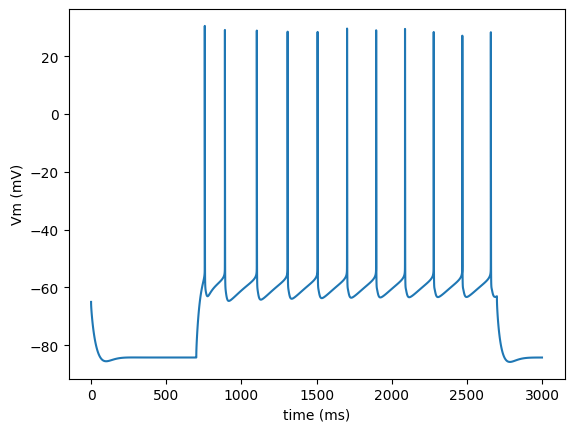

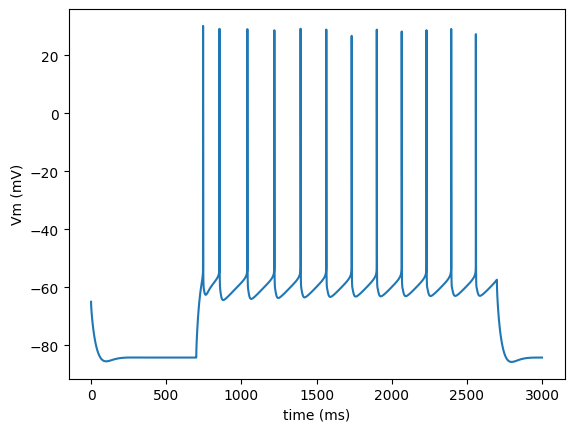

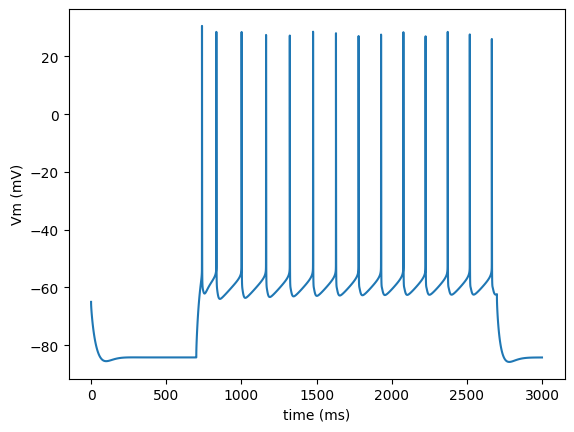

In [7]:
import run
run.main(plot_traces=True)

Load the output of the model package in numpy array

In [8]:
import numpy
times = []
voltages = []
for step_number in range(1,4):
    data = numpy.loadtxt('python_recordings/soma_voltage_step%d.dat' % step_number)
    times.append(data[:, 0])
    voltages.append(data[:, 1])

Prepare the traces for the eFEL

In [9]:
traces = []
for step_number in range(3):
    trace = {}
    trace['T'] = times[step_number]
    trace['V'] = voltages[step_number]
    trace['stim_start'] = [700]
    trace['stim_end'] = [2700]
    traces.append(trace)

Run the eFEL on the trace

In [10]:
feature_values = efel.get_feature_values(traces, ['mean_frequency', 'adaptation_index2', 'ISI_CV', 'doublet_ISI', 'time_to_first_spike', 'AP_height', 'AHP_depth_abs', 'AHP_depth_abs_slow', 'AHP_slow_time', 'AP_width', 'peak_time', 'AHP_time_from_peak'])

Plot frequencies over steps

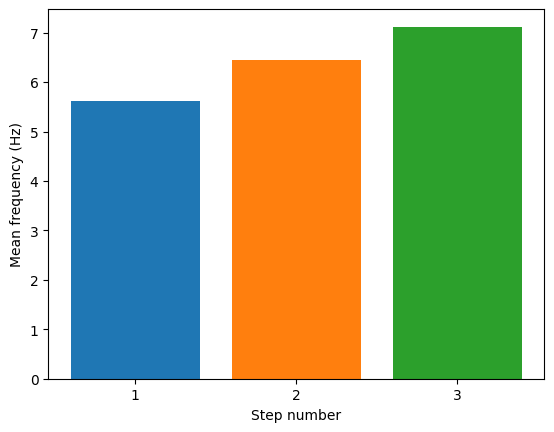

In [11]:
import pylab
for step_number in range(3):
    pylab.bar(step_number, feature_values[step_number]['mean_frequency'][0], align='center')
pylab.ylabel('Mean frequency (Hz)')
pylab.xlabel('Step number')
pylab.xticks(range(3), range(1,4))
pylab.show()

Plot AP height and AHP depth

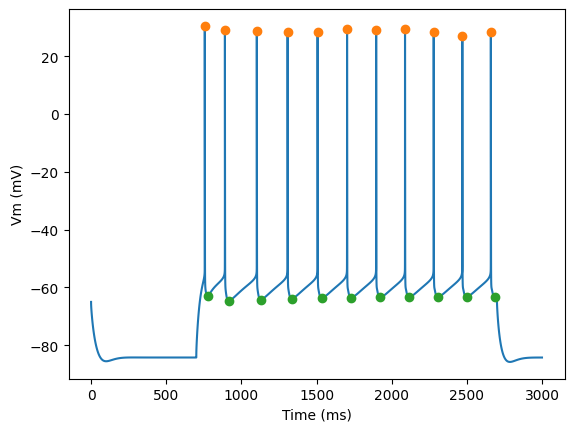

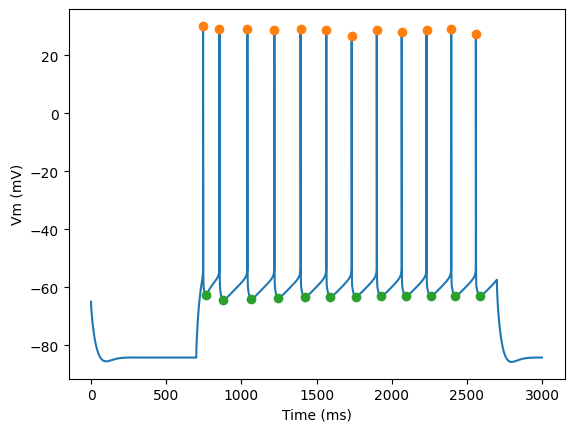

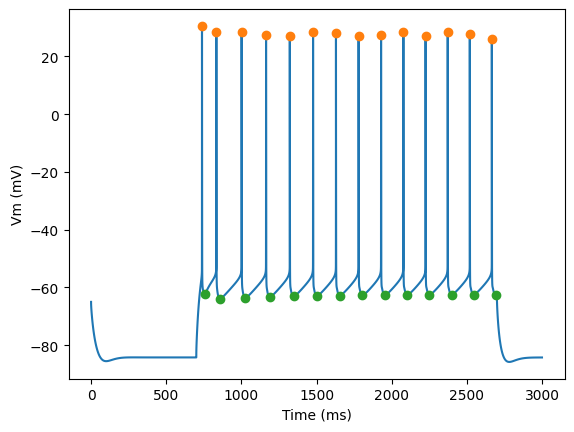

In [16]:
for step_number in range(3):
    time = times[step_number]
    voltage = voltages[step_number]
    peak_times = feature_values[step_number]['peak_time']
    ahp_time = feature_values[step_number]['AHP_time_from_peak']
    ap_heights = feature_values[step_number]['AP_height']
    AHP_depth_abss = feature_values[step_number]['AHP_depth_abs']
    
    pylab.plot(time,voltage)
    pylab.plot(peak_times, ap_heights, 'o')
    pylab.plot(peak_times+ahp_time, AHP_depth_abss, 'o')
    pylab.xlabel('Time (ms)')
    pylab.ylabel('Vm (mV)')
    pylab.show()